In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/tiago-santos-ulus/sim_2019/master/data/wine_q.csv"
wine_df = pd.read_csv(url, sep=",")
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [3]:
##duplicates
wine_df.drop_duplicates(keep='first')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


Não existe duplicados, pois o DataFrame.drop_duplicates retorna um DataFrame sem os duplicados. Como o DataFrame ficou exatamente o mesmo, é porque não existe.

In [4]:
wine_df.duplicated().sum()

0

Com isto, verificamos que não tem mesmo duplicados.

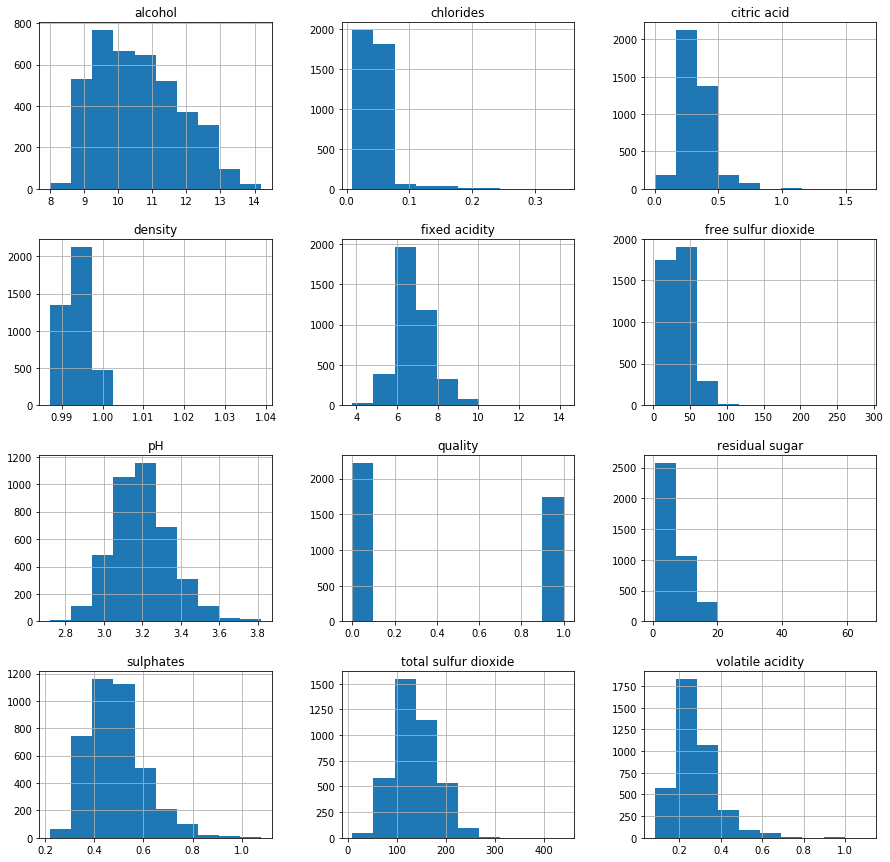

In [6]:
hist=wine_df.hist(figsize=(15,15))

Por inspeção visual, os histogramas que são distribuição normal são: fixed acidity, pH, sulphates e total sulfur dioxide.

In [7]:
from scipy import stats
for col in wine_df.columns.values:
    print(stats.jarque_bera(wine_df[col]))

(1154.1959249402914, 0.0)
(6446.805928256506, 0.0)
(8842.606940336995, 0.0)
(6484.481707860443, 0.0)
(224093.90964878083, 0.0)
(31322.882464830083, 0.0)
(226.28045837594703, 0.0)
(34186.93200941494, 0.0)
(186.35909487220525, 0.0)
(982.6566465677099, 0.0)
(214.08677534188936, 0.0)
(660.7384825453336, 0.0)


Em qualquer teste estatistico existe sempre a Hipótese nula e a Hipótese Alternativa. Neste caso a nossa hipótese nula será se é uma distribuição normal ou não. Como o nosso p-value de todas as colunas é zero,ou seja, a baixo de 0.1, então vamos rejeitar a hipotese nula. Com isto, concluimos que nenhuma é distribuição normal

In [8]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788,-0.060554
volatile acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815,-0.128758
citric acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514,-0.003850
residual sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167,-0.111200
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928,-0.178563
free sulfur dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768,-0.022225
total sulfur dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643,-0.164453
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162,-0.267015
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095,0.092415
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850,0.043907


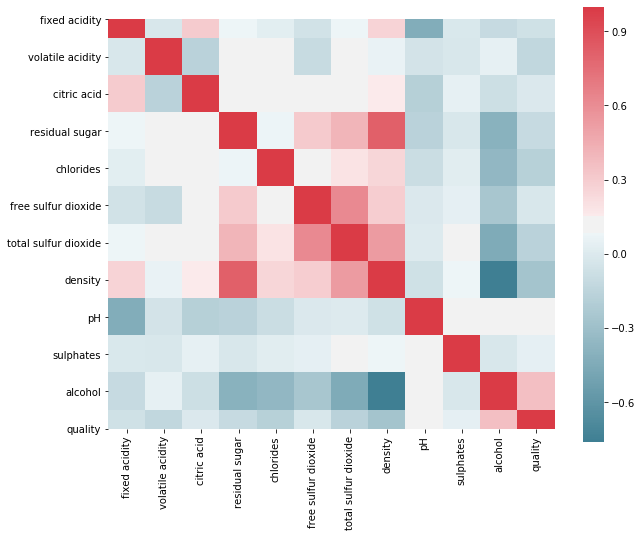

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

f, ax = plt.subplots(figsize=(10, 8))
corr = wine_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Com este gráfico conseguimos ver que existe muito pouca correlação entre as componentes, e assim sendo, aplicar PCA não será uma grande mais valia, pois o PCA depende muito da normalidade e da correlção.

### Analisar os pontos 5 e 6 e explicar se é para aplicar o PCA ou não
Visto que os pontos 5 e 6 estão 60% relacionadas, faz todo sentido aplicar PCA. Ao aplicar o PCA o que nós pretendemos é reduzir as dimensões. Se estas dimensões estão 60% correlacionadas, então ao aplicar o PCA estas deverão estar na mesma componente.

In [21]:
independents = wine_df.iloc[:,:-1].to_numpy()
dependents = wine_df.iloc[:,-1].to_numpy()


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
wine_mtrx_norml = scaler.fit_transform(independents)
pca_norm = PCA(n_components=wine_df.shape[1]-1)
pca_norm.fit(wine_mtrx_norml)
wine_norm_pca_loadings = pd.DataFrame(pca_norm.components_.transpose(), index = wine_df.iloc[:,:-1].columns, columns=[f"PC{i}" for i in range(1,wine_df.shape[1]) ])
wine_norm_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed acidity,0.152835,-0.595986,-0.055466,0.003065,0.260053,0.002843,-0.211089,0.563920,0.370509,0.136228,-0.179780
volatile acidity,0.026771,0.063344,0.672198,0.168251,0.383853,0.433047,0.285174,0.108064,-0.179983,0.233361,-0.019625
citric acid,0.151911,-0.384032,-0.461453,0.142312,0.000857,0.120641,0.711136,-0.072173,-0.261001,0.050317,-0.010951
residual sugar,0.422095,0.024514,0.202225,-0.280083,0.159016,-0.263243,0.241202,-0.422158,0.358607,-0.072347,-0.486911
chlorides,0.211968,-0.029701,0.108585,0.669413,-0.487061,0.244592,-0.022996,-0.136997,0.417670,-0.052923,-0.026149
free sulfur dioxide,0.308153,0.260425,-0.309921,-0.337623,-0.099782,0.495466,-0.142814,-0.058128,0.125295,0.575552,0.031692
total sulfur dioxide,0.416806,0.225205,-0.123396,-0.093913,0.109857,0.376190,-0.055537,0.274100,-0.110490,-0.711630,-0.032872
density,0.512038,0.013104,0.128844,0.006199,0.085378,-0.349913,0.080040,0.050298,0.079800,0.074948,0.755219
pH,-0.114020,0.578270,-0.145005,0.134127,-0.003516,-0.257729,0.400874,0.526391,0.269723,0.123225,-0.146379
sulphates,0.047439,0.191317,-0.352815,0.497931,0.658631,-0.063262,-0.262524,-0.274051,-0.009803,0.070471,-0.043031


In [23]:
pca_norm.explained_variance_ratio_

array([0.28941239, 0.14513327, 0.11027694, 0.09445886, 0.08919371,
       0.08448178, 0.06564064, 0.05473092, 0.03898492, 0.02553686,
       0.0021497 ])

In [24]:
var_cumsum = np.cumsum(pca_norm.explained_variance_ratio_)
# from which index to I have a variance of more than 88%?
np.argwhere(var_cumsum > 0.88)[0]

array([7])

Já com o PCA normalizado verificamos que com 8 componentes (array[7]) temos uma veriancia de mais de 88%.

In [25]:
pca_pc8 = PCA(n_components=8)
wine_norm_pca_data = pca_pc8.fit_transform(wine_mtrx_norml)
wine_norm_pca_scored_df = pd.DataFrame(wine_norm_pca_data, columns=[f"PC{i}" for i in range(1,wine_norm_pca_data.shape[1]+1) ])
wine_norm_pca_scored_df["target"] = dependents
wine_norm_pca_scored_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,target
0,3.862702,-0.511138,0.906204,-1.189948,0.160987,-1.203505,0.134813,-1.207956,0
1,-0.511673,0.436496,0.345879,1.057328,-0.404488,-0.764931,0.263452,0.594880,1
2,0.284474,-1.171489,0.115821,0.240730,-0.104588,-0.794319,0.443306,0.875711,0
3,1.585098,0.062778,-0.080411,-0.529644,-0.804770,0.210587,-0.240052,0.499705,0
4,0.215305,0.886144,1.277464,-0.077055,-0.249904,-0.566766,-0.796586,-0.185385,1


Visto que para explicar 88% do dataset precisamos de 8 componentes, a aplicação do PCA não foi bem sucedida. Sem ficassemos apenas com 4 componentes em 11, seria muito melhor.

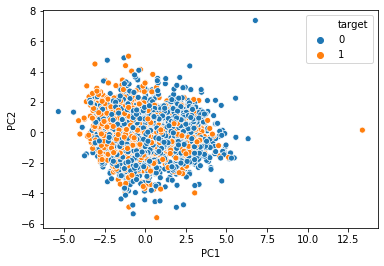

In [26]:
import seaborn
seaborn.scatterplot(data=wine_norm_pca_scored_df, x="PC1", y="PC2", hue="target")

Não sei qual a conclusão, em relação à primeira previsão.

In [33]:
from sklearn.model_selection import train_test_split
#Se o test_size for none (default) ficamos com 25% testing 
xTrain, xTest, yTrain, yTest = train_test_split(independents, dependents, test_size=None, random_state = 0)


In [34]:
from sklearn.linear_model import LogisticRegression
def train(xTrain, yTrain):    
    clf = LogisticRegression(random_state = 0, solver = 'lbfgs')
    model = clf.fit(xTrain, yTrain)
    return model

In [35]:
from sklearn.metrics import classification_report
model = train(xTrain,yTrain)
y_pred = model.predict(xTest)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       561
           1       0.64      0.54      0.59       430

    accuracy                           0.67       991
   macro avg       0.66      0.65      0.66       991
weighted avg       0.67      0.67      0.67       991



/home/tiago/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [36]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(yTest, y_pred)

0.31866330159479533